In [4]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder
from PIL import Image

In [11]:
# Directory of new images
new_image_dir = r'C:\Users\bruna\OneDrive\Microbialdataset\Culture_dataset'

In [12]:
# Function for uploading images
def load_image(image_path, target_size=(112, 112)):
    try:
        image = Image.open(image_path)
        image = image.resize(target_size)  
        return np.array(image) / 255.0  
    except Exception as e:
        print(f"Erro ao carregar a imagem {image_path}: {e}")
        return None

In [13]:
# Load the model
model = load_model('trained_model.lower_resolution')

In [19]:
# Upload new images
def load_new_images(image_dir, target_size=(112, 112)):
    new_images = []
    image_paths = []
    for root, dirs, files in os.walk(image_dir):  # Use os.walk to browse subfolders
        for filename in files:
            if filename.endswith('.jpg') or filename.endswith('.png'):  # Include other formats if necessary
                image_path = os.path.join(root, filename)
                image = load_image(image_path, target_size)
                if image is not None:
                    new_images.append(image)
                    image_paths.append(image_path)  # Add the image path
    return np.array(new_images), image_paths

In [20]:
# Upload the new images
new_images, image_paths = load_new_images(new_image_dir)

In [21]:
# Making predictions
if new_images.size == 0:
    print("Nenhuma imagem foi carregada. Verifique o diretório e o formato das imagens.")
else:
    predictions = model.predict(new_images)
    print("Previsões feitas com sucesso!")

1/1 [==============================] - 0s 100ms/step
Previsões feitas com sucesso!


In [22]:
# Decode the forecasts
predicted_classes = np.argmax(predictions, axis=1)

In [25]:
class_names = {
    0: "P.aeruginosa_Higher_resolution",
    1: "P.aeruginosa_Lower_resolution",
    2: "S.aureus_Higher_resolution",
    3: "S.aureus_Lower_resolution"
}

In [26]:
# Display results
for img_path, label in zip(image_paths, predicted_classes):
    class_name = class_names.get(label, "Classe Desconhecida")
    print(f"Imagem: {img_path}, Classe Prevista: {class_name}")

Imagem: C:\Users\bruna\OneDrive\Microbialdataset\Culture_dataset\P.aeruginosa_Higher_resolution\16.jpg, Classe Prevista: P.aeruginosa_Higher_resolution
Imagem: C:\Users\bruna\OneDrive\Microbialdataset\Culture_dataset\P.aeruginosa_Higher_resolution\17.jpg, Classe Prevista: P.aeruginosa_Higher_resolution
Imagem: C:\Users\bruna\OneDrive\Microbialdataset\Culture_dataset\P.aeruginosa_Higher_resolution\18.jpg, Classe Prevista: P.aeruginosa_Higher_resolution
Imagem: C:\Users\bruna\OneDrive\Microbialdataset\Culture_dataset\P.aeruginosa_Higher_resolution\19.jpg, Classe Prevista: P.aeruginosa_Higher_resolution
Imagem: C:\Users\bruna\OneDrive\Microbialdataset\Culture_dataset\P.aeruginosa_Lower_resolution\21.jpg, Classe Prevista: P.aeruginosa_Lower_resolution
Imagem: C:\Users\bruna\OneDrive\Microbialdataset\Culture_dataset\P.aeruginosa_Lower_resolution\22.jpg, Classe Prevista: P.aeruginosa_Lower_resolution
Imagem: C:\Users\bruna\OneDrive\Microbialdataset\Culture_dataset\P.aeruginosa_Lower_resoluti

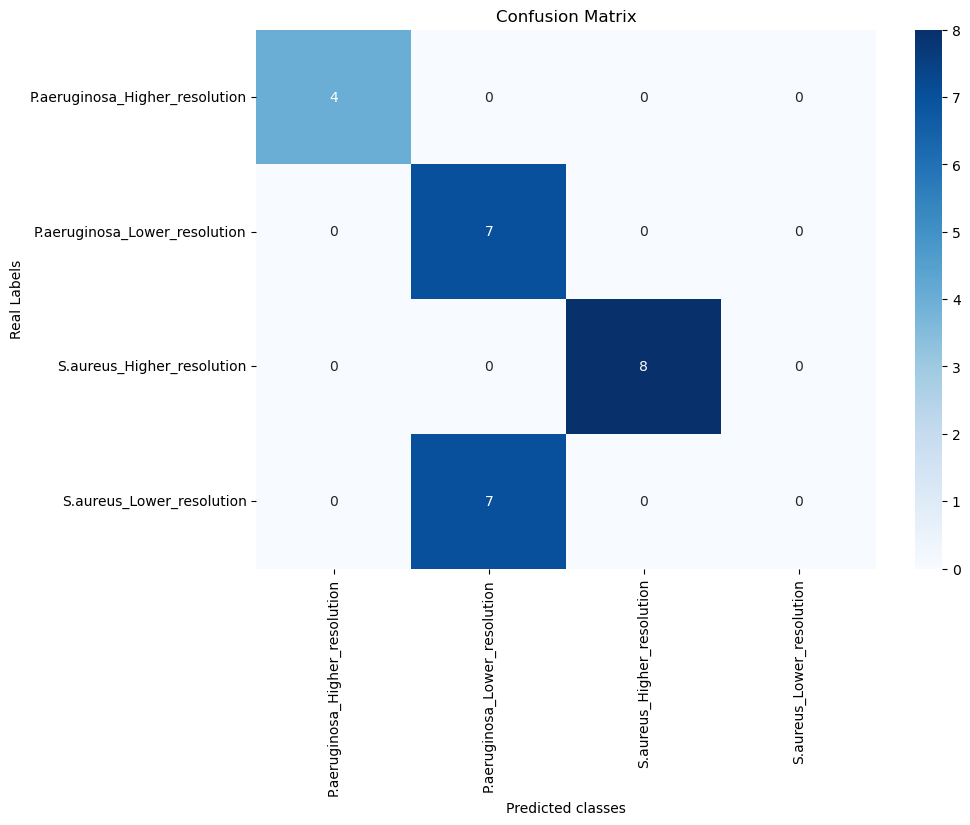

                                precision    recall  f1-score   support

P.aeruginosa_Higher_resolution       1.00      1.00      1.00         4
 P.aeruginosa_Lower_resolution       0.50      1.00      0.67         7
    S.aureus_Higher_resolution       1.00      1.00      1.00         8
     S.aureus_Lower_resolution       0.00      0.00      0.00         7

                      accuracy                           0.73        26
                     macro avg       0.62      0.75      0.67        26
                  weighted avg       0.60      0.73      0.64        26



C:\Users\bruna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bruna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bruna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Suppose you have the following true labels corresponding to your images
true_labels = [
    0, 0, 0, 0,  # Images de P.aeruginosa_Higher_resolution
    1, 1, 1, 1, 1, 1, 1,  # Images de P.aeruginosa_Lower_resolution
    2, 2, 2, 2, 2, 2, 2, 2,  # Images de S.aureus_Higher_resolution
    3, 3, 3, 3, 3, 3, 3  # Images de S.aureus_Lower_resolution
]

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)

# Visualise the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names.values(), 
            yticklabels=class_names.values())
plt.ylabel('Real Labels')
plt.xlabel('Predicted classes')
plt.title('Confusion Matrix')
plt.show()

# Display the classification report
print(classification_report(true_labels, predicted_classes, target_names=class_names.values()))


In [44]:
# Calculate accuracy
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
accuracy = accuracy_score(true_labels, predicted_classes)
print(f'Acurácia: {accuracy:.2f}')

Acurácia: 0.73


In [37]:
predicted_probabilities = model.predict(new_images)

1/1 [==============================] - 0s 121ms/step


In [38]:
probs = predicted_probabilities[:, 1]

In [41]:
# Binarise true labels for multiple classes
n_classes = len(class_names)
true_labels_binarized = label_binarize(true_labels, classes=range(n_classes))

In [42]:
# Find the optimum threshold
optimal_idx = np.argmax(tpr - fpr)  # Maximises TPR - FPR
optimal_threshold = thresholds[optimal_idx]

print(f'Threshold ótimo: {optimal_threshold:.2f}')

Threshold ótimo: 1.00


In [46]:
# For each class, calculate the ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels_binarized[:, i], predicted_probabilities[:, i])
    roc_auc[i] = roc_auc_score(true_labels_binarized[:, i], predicted_probabilities[:, i])

Média da AUC (macro): 0.79


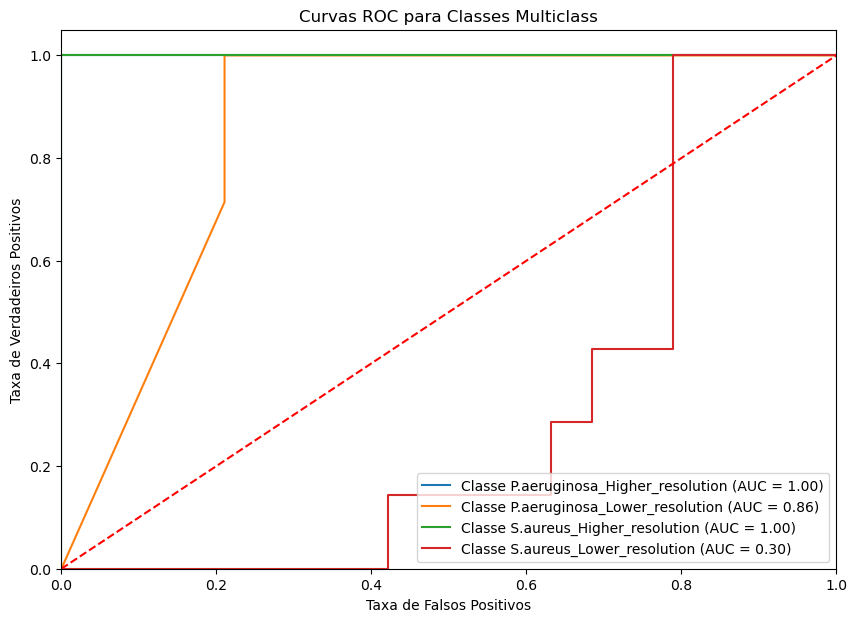

In [47]:
# Calculate the average AUC
roc_auc_macro = np.mean(list(roc_auc.values()))
print(f'Média da AUC (macro): {roc_auc_macro:.2f}')

# Visualise the ROC curves for each class
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Classe {class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curvas ROC para Classes Multiclass')
plt.legend(loc='lower right')
plt.show()